# Importing the Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Reading the CSV file

In [7]:
df = pd.read_csv('hotel_bookings 2.csv')

## Data Cleaning

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [9]:
df.shape

(119390, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [12]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [14]:
#df.duplicated().sum()

In [15]:
#df = df.drop_duplicates()
#df

In [16]:
df.shape

(119390, 32)

In [17]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
df = df.drop(['agent', 'company'], axis=1)

In [19]:
df= df.dropna()

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Data Analysis & Visualizations

In [22]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64

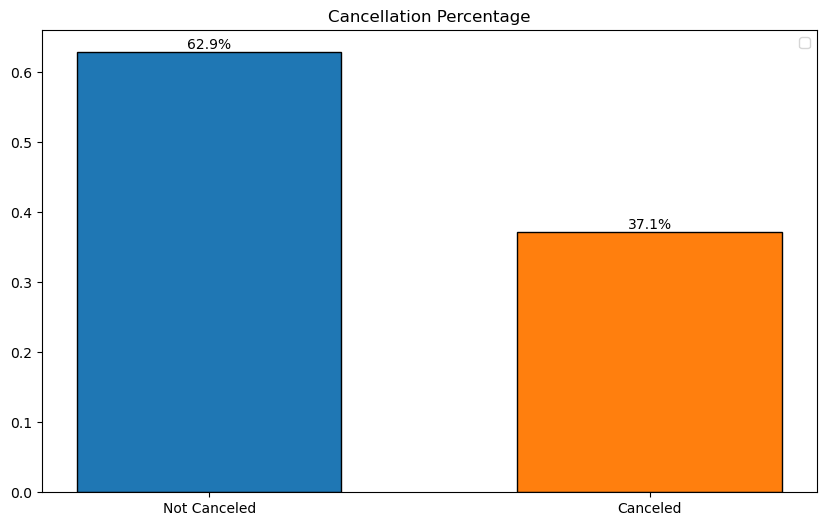

In [23]:
cancelled_per= df['is_canceled'].value_counts(normalize=True)
cancelled_per
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Cancellation Percentage')
plt.bar(['Not Canceled','Canceled'],cancelled_per,edgecolor = 'k',width=0.6, color =['tab:blue','tab:orange'])
plt.legend('Not Canceled','Canceled')

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.1%}')
plt.show()

**The Accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obviuos that there are still a significant no. of reservations that have not been canceled. There are still 37%  of clients who canceled their reservations, which has a significant impact on the hotels earnings**

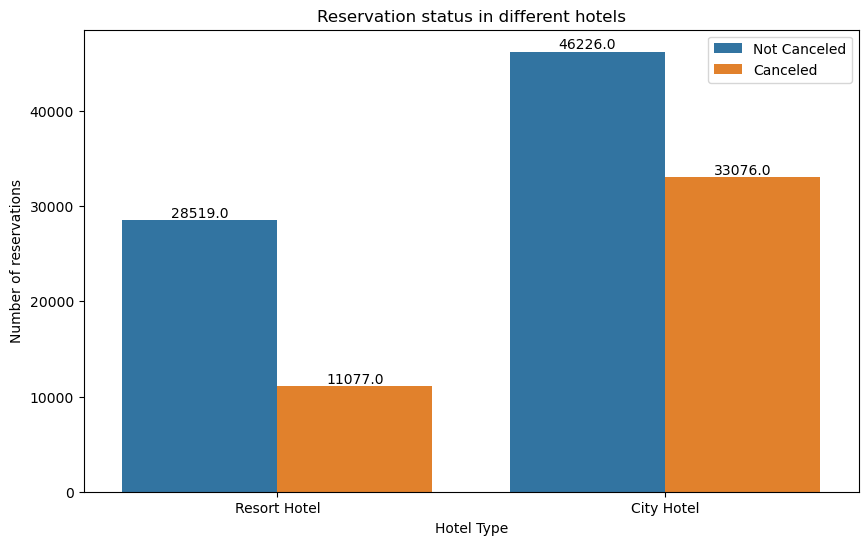

In [24]:

fig, ax = plt.subplots(figsize=(10, 6))
ax1 = sns.countplot(x='hotel', hue ='is_canceled',data = df)
plt.title('Reservation status in different hotels')
plt.xlabel('Hotel Type')
plt.ylabel('Number of reservations')
plt.legend(['Not Canceled', 'Canceled'])


for container in ax.containers:
    ax.bar_label(container, fmt='{}')
plt.show()

**In Comparison to resort hotels, city hotels have more bookings. It's possible that resort hotels are more expensive than those in cities**

In [25]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [26]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582911
1    0.417089
Name: proportion, dtype: float64

In [27]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

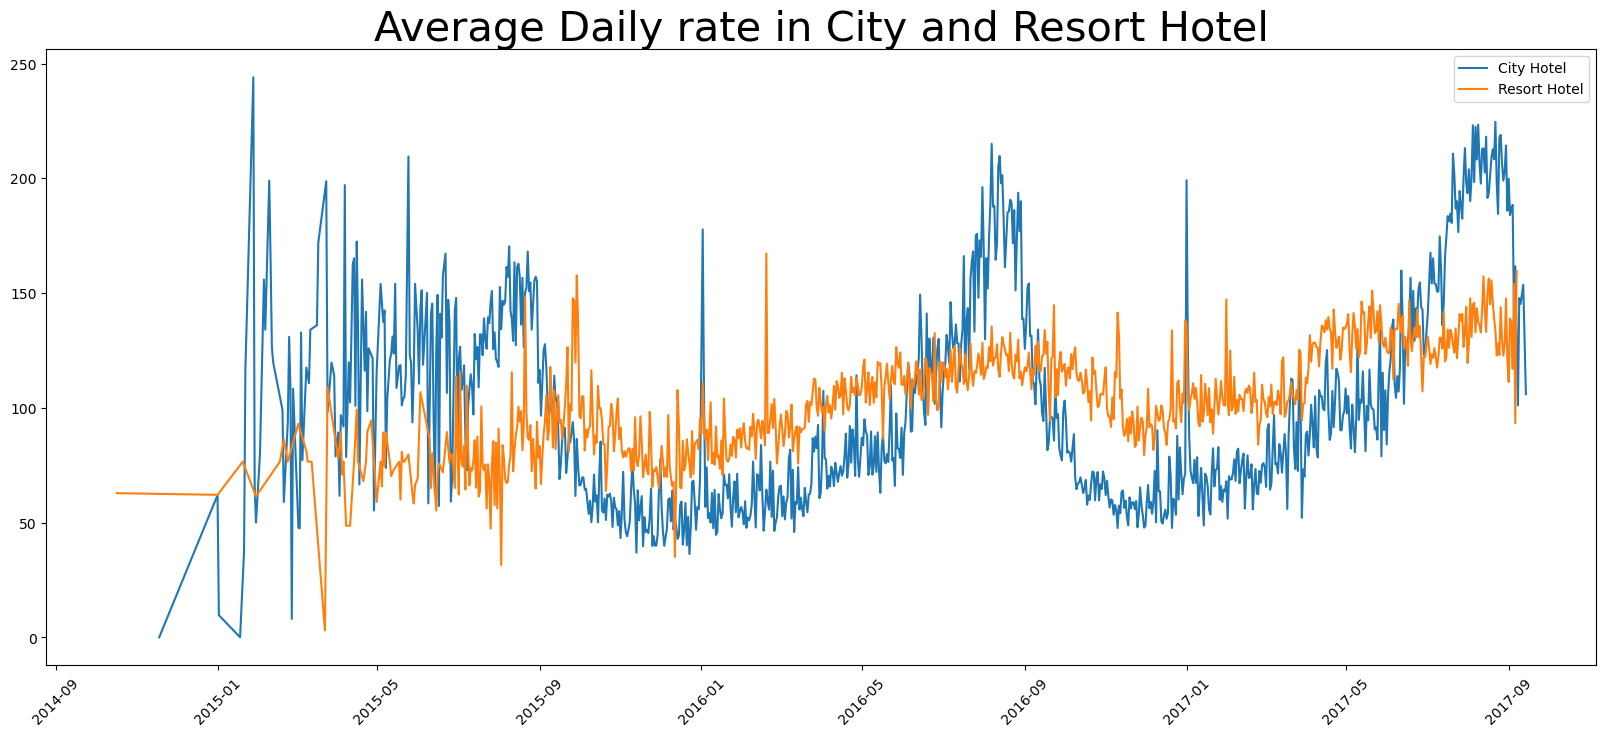

In [28]:
plt.figure(figsize=(20, 8))
plt.title("Average Daily rate in City and Resort Hotel", fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.xticks(rotation=45)
plt.legend(['City Hotel', 'Resort Hotel'])
plt.show()

**The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates**

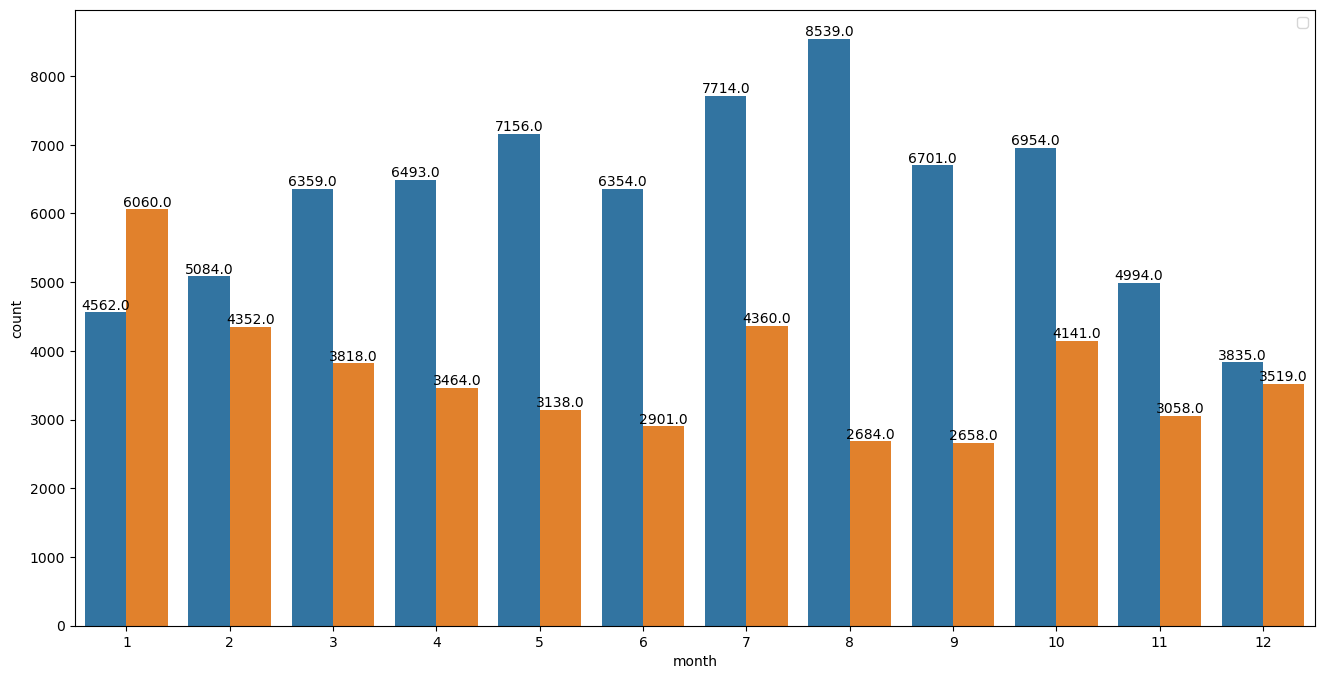

In [29]:
df['month'] = df['reservation_status_date'].dt.month
fig, ax = plt.subplots(figsize=(16, 8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df)
plt.legend('Not Canceled','Canceled')


for container in ax.containers:
    ax.bar_label(container, fmt='{}')
plt.show()

**We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels accordiing to reservation status, As can be seen, both the no. of confirmed reservations and the no. of canceled reservations are largest in the month of August. whereas January is the month with the most canceled reservations**

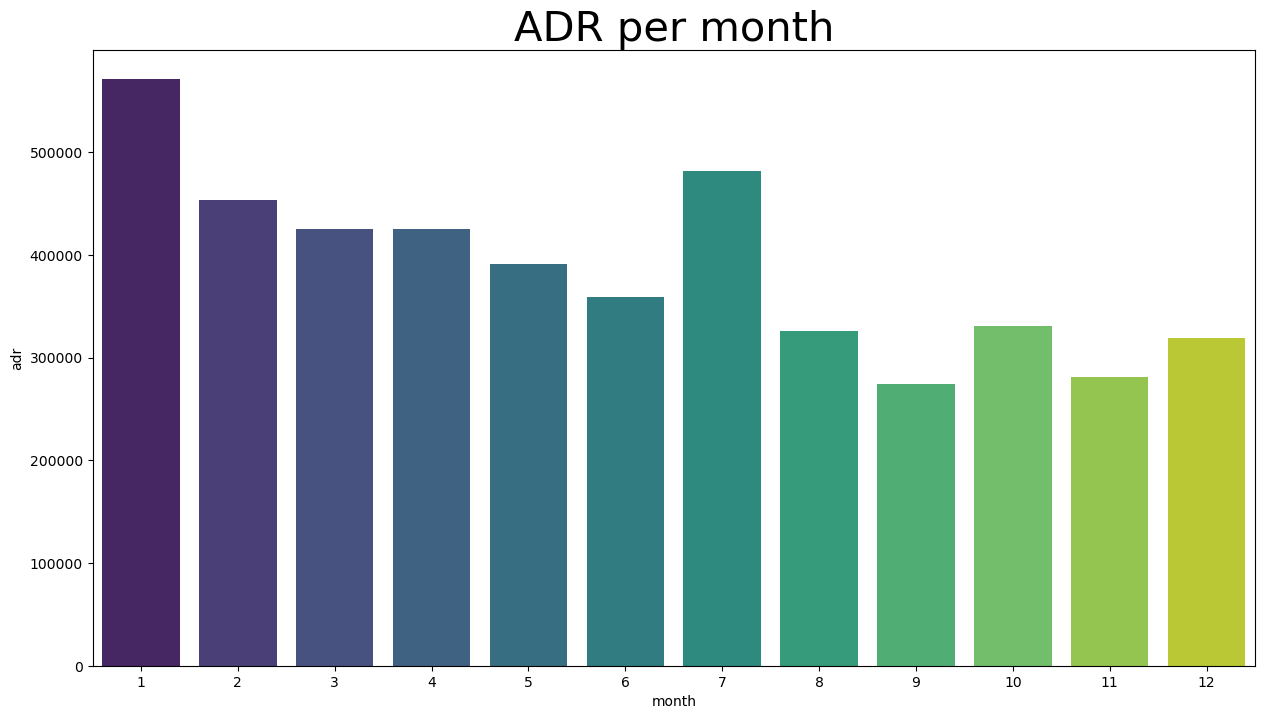

In [30]:
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), palette='viridis')
plt.show()


**The bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accomodations is solely responsible for the cancellations.**


([<matplotlib.patches.Wedge at 0x2ce51c35880>,
 [Text(-0.6485627932914347, 0.8884628878900974, 'PRT'),
  Text(-0.12448208506709475, -1.0929337630878408, 'GBR'),
  Text(0.27961841679380417, -1.0638672572223127, 'ESP'),
  Text(0.6082658179076615, -0.9165220645271579, 'FRA'),
  Text(0.8244472353575597, -0.7282079072018354, 'ITA'),
  Text(0.9549296655412358, -0.5459938954505844, 'DEU'),
  Text(1.031263324511448, -0.38274790073571413, 'IRL'),
  Text(1.0729039635595403, -0.24264600754644422, 'BRA'),
  Text(1.0926165756675046, -0.1272360741952387, 'USA'),
  Text(1.0992091152526196, -0.0417051668927687, 'BEL')],
 [Text(-0.3537615236135098, 0.4846161206673258, '70.07%'),
  Text(-0.06789931912750621, -0.596145688957004, '6.25%'),
  Text(0.1525191364329841, -0.5802912312121705, '5.54%'),
  Text(0.3317813552223608, -0.4999211261057224, '4.93%'),
  Text(0.4496984920132143, -0.39720431301918285, '3.39%'),
  Text(0.5208707266588558, -0.2978148520639551, '3.10%'),
  Text(0.5625072679153352, -0.2087715

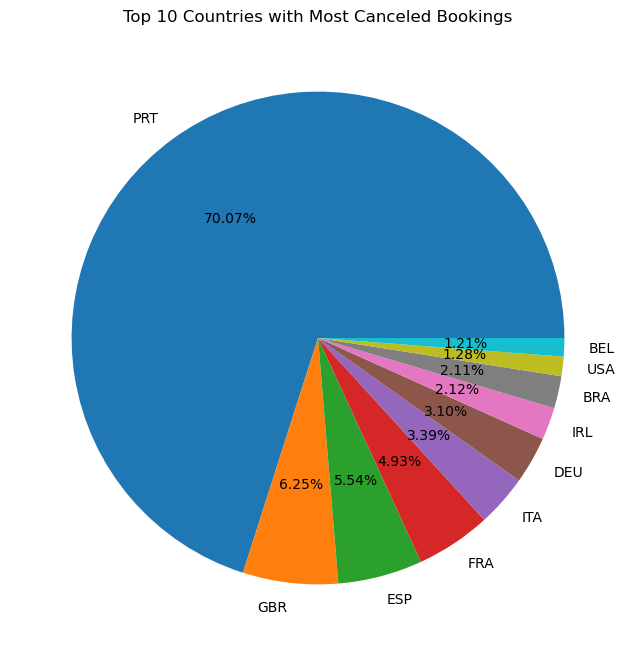

In [31]:
canceled_data = df[df['is_canceled'] == 1]
top_10_country = canceled_data['country'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with Most Canceled Bookings')
plt.pie(top_10_country, labels=top_10_country.index, autopct='%0.2f%%')


**Now, let's see which country has the hightest reservations canceled. The top country is portugal with the highest no. of cancellations**

In [32]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

**The area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline Travel Agents?**

**Around 46% of the clients come from online travel agencies, where 27% come from groups, Only 4% of clients book hotels directly by visiting them and making reservations.**

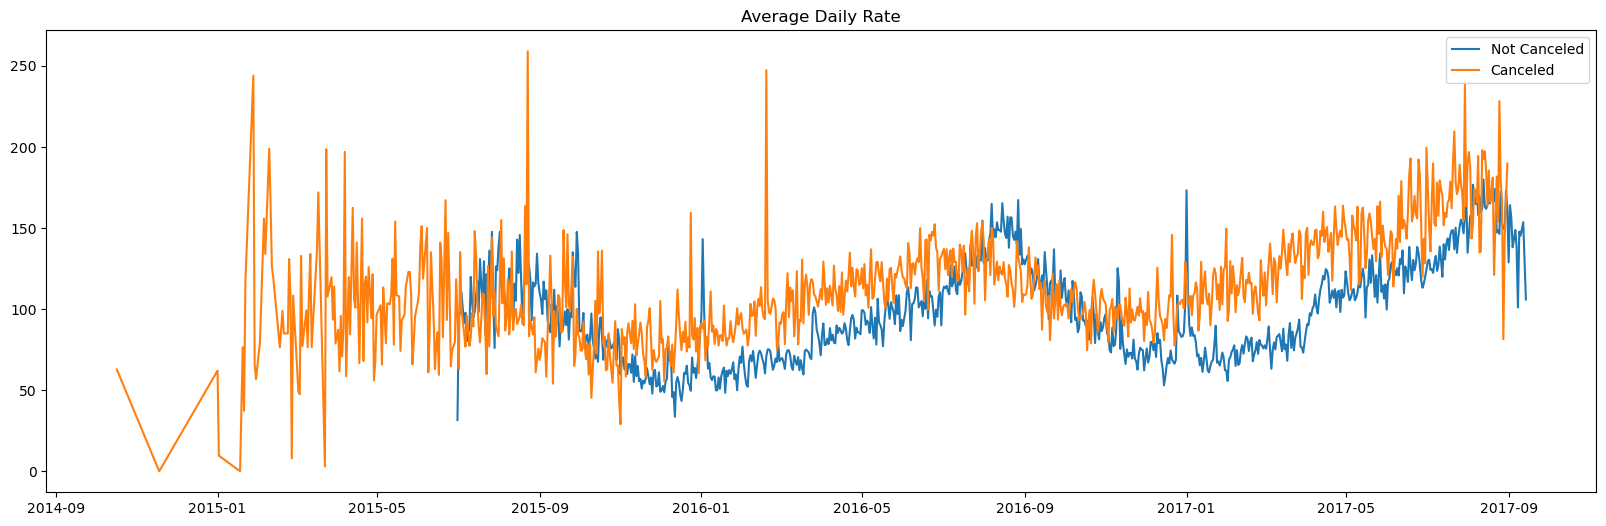

In [33]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace = True)

not_canceled_data = df[df['is_canceled'] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace = True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='Not Canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='Canceled')
plt.legend()
plt.show()

In [34]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date'] >= '2016-01-01') & (canceled_df_adr['reservation_status_date'] <= '2017-09')]
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date'] >= '2016-01-01') & (not_canceled_df_adr['reservation_status_date'] <= '2017-09')]

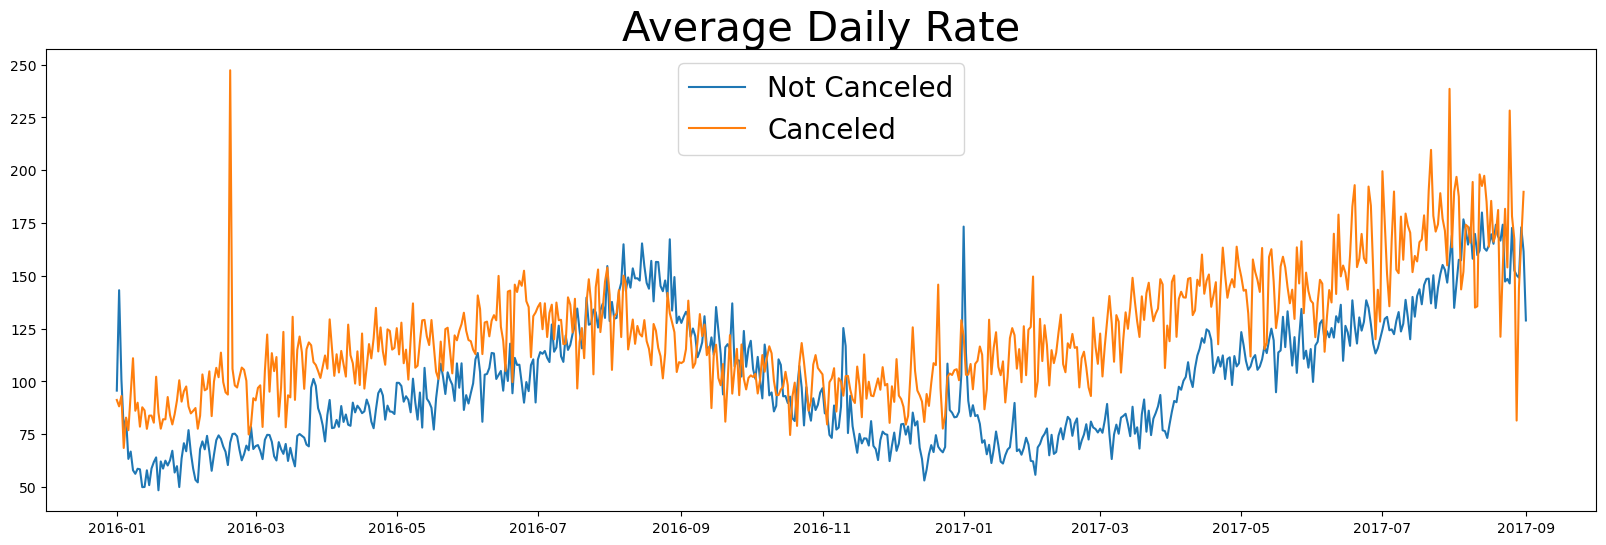

In [35]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', fontsize=30)
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='Not Canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='Canceled')
plt.legend(fontsize=20)
plt.show()

**As seen in the graph, reservations are cancelled when the average daily rate is higher than when it is canceled. It is clearly proves all the above analysis, that the higher price leads to higher cancellations.**

## **Suggestions:**

1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.
2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.
4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.
